### Month against sum

In [14]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

initial = 0
months = 36
inf = float('inf')
net_gain = 0
curr_time = datetime.now()
bank_base = {"DBS": [0,50000,100000,inf], 
             "DBS_bare": [0,10000, inf], 
             "UOB":[0,15000,30000,45000,60000,75000, inf], 
             "OCBC_bare":[0, 25000, 50000, 75000, inf], 
             "SC":[0, 80000,inf]}
bank_int = {"DBS": [0.008,0.016,0.0005],
            "DBS_bare": [0.004,0.0005], 
            "UOB":[0.005, 0.0055,0.0065,0.008,0.025,0.005],
            "OCBC_bare":[0.0045, 0.0085, 0.021,0.0005], 
            "SC":[0.0038,0.0001]} # p.a. compounded monthly
bank_min_amt_rate = {"OCBC_bare":["base>=200000", 0.004, "75000"]} # condition, int, eligible amt
banks = ["DBS", "DBS_bare", "UOB", "OCBC_bare", "SC"]
# banks = ["OCBC_bare"]
data_pts = dict(zip(banks,[[] for _ in range(len(banks))]))

def get_time_months_away(m):
    t = datetime.now() + relativedelta(months=+m)
    return datetime.strptime(str((t.month%12)+1),"%m").strftime("%B") + " " + str(t.year)
def get_savings_per_month():
    print("Initial", initial)
    for b in banks:
        base = initial
        ints = [i/12 for i in bank_int[b]]
        for m in range(months):
            res = 0
            if b in bank_min_amt_rate and eval(bank_min_amt_rate[b][0]):
                res += bank_min_amt_rate[b][1]*eval(bank_min_amt_rate[b][2])
            res += sum([max(0, min(base, bank_base[b][i+1])-bank_base[b][i]) * ints[i] for i in range(len(bank_int[b]))])
            base += (res+net_gain)
            data_pts[b].append(base)
#             print(b, get_time?_months_away(m), ":", base)
            
get_savings_per_month()

Initial 0


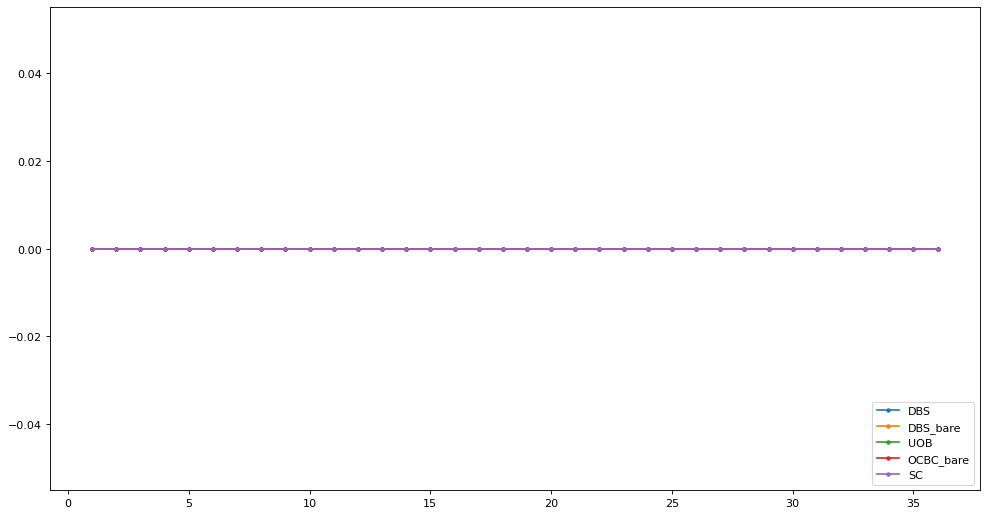

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 8), dpi=80)
for k, v in data_pts.items():
    plt.plot(range(1, len(v) + 1), v, '.-', label=k)
#     plt.text(a, b, str(b))
plt.legend(loc='lower right')